In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 19_Pharmaceutical Mothly Drug Profits Analytics By Alfin Bahru Rahmika Umar\salesmonthly.csv")
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (70, 9)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.1+ KB


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [6]:
print("Shape dataset asli:", df.shape)

# Deteksi duplikat & missing values
print("Jumlah duplikat:", df.duplicated().sum())
print("Missing values per kolom:\n", df.isnull().sum())

# Fungsi untuk mendeteksi dan menghapus outliers (metode IQR)
def remove_outliers(data, cols):
    df_clean = data.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Daftar kolom profit
profit_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

Shape dataset asli: (70, 9)
Jumlah duplikat: 0
Missing values per kolom:
 datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64


In [7]:
# 2. Data Cleaning: hapus duplikat, missing values, dan outliers
df_clean = df.drop_duplicates().dropna()
df_clean = remove_outliers(df_clean, profit_cols)
print("Shape dataset setelah cleaning:", df_clean.shape)

Shape dataset setelah cleaning: (57, 9)


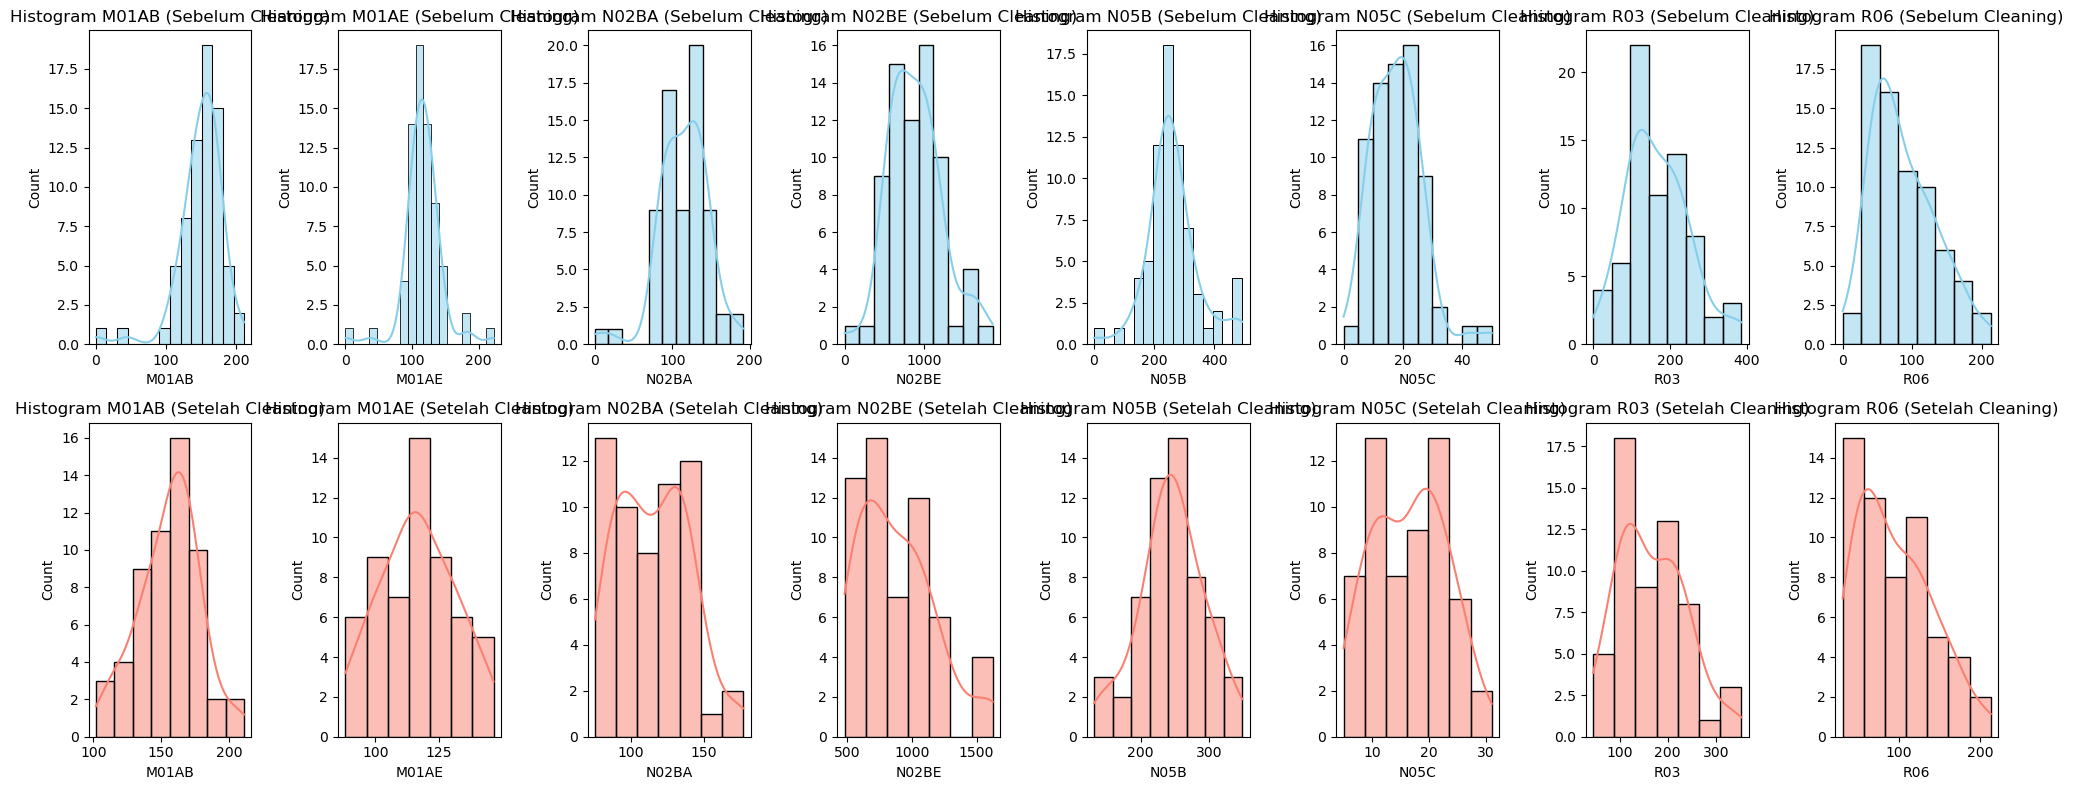

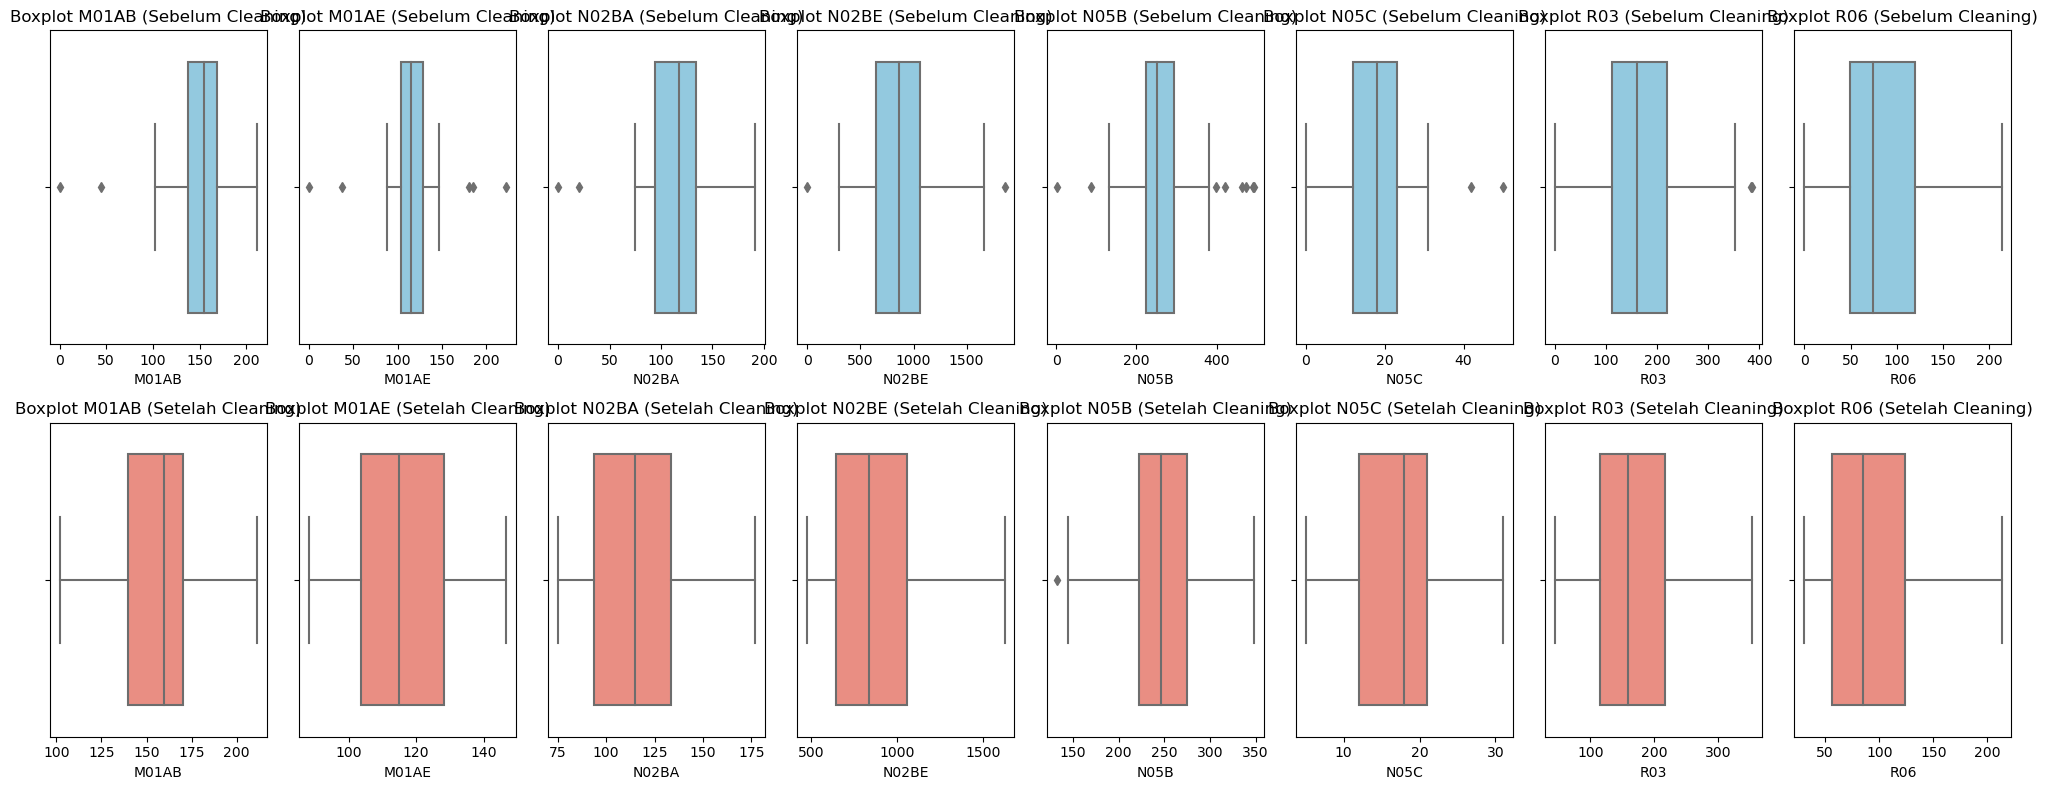

In [8]:
# 3. Visualisasi perbandingan: Histogram dan Boxplot sebelum & sesudah cleaning
# Histogram
fig, axes = plt.subplots(2, len(profit_cols), figsize=(20, 8))
for i, col in enumerate(profit_cols):
    sns.histplot(df[col], ax=axes[0, i], kde=True, color='skyblue')
    axes[0, i].set_title(f'Histogram {col} (Sebelum Cleaning)')
    
    sns.histplot(df_clean[col], ax=axes[1, i], kde=True, color='salmon')
    axes[1, i].set_title(f'Histogram {col} (Setelah Cleaning)')
plt.tight_layout()
plt.show()

# Boxplot
fig, axes = plt.subplots(2, len(profit_cols), figsize=(20, 8))
for i, col in enumerate(profit_cols):
    sns.boxplot(x=df[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot {col} (Sebelum Cleaning)')
    
    sns.boxplot(x=df_clean[col], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot {col} (Setelah Cleaning)')
plt.tight_layout()
plt.show()

In [9]:
# 4. Simpan dataset yang telah dibersihkan sebagai file CSV baru
df_clean.to_csv('salesmonthly-CLEANED.csv', index=False)
print("Dataset cleaned telah disimpan sebagai salesmonthly-CLEANED.csv")

Dataset cleaned telah disimpan sebagai salesmonthly-CLEANED.csv


In [10]:
# Pastikan untuk menggunakan dataset yang sudah dibersihkan
# Jika dijalankan secara terpisah, baca file yang sudah dibersihkan:
df_clean = pd.read_csv('salesmonthly-CLEANED.csv')

# Konversi kolom tanggal ke datetime dan ekstrak Bulan-Tahun
df_clean['datum'] = pd.to_datetime(df_clean['datum'])
df_clean['Month_Year'] = df_clean['datum'].dt.strftime('%Y-%m')

In [20]:
# Menghitung total profit per obat
total_profit = df_clean[profit_cols].sum()
print("Total Profit per Obat:\n \n",total_profit)

Total Profit per Obat:
 
 M01AB     8892.960
M01AE     6645.157
N02BA     6591.235
N02BE    50168.195
N05B     13992.100
N05C       946.000
R03       9510.000
R06       5404.610
dtype: float64


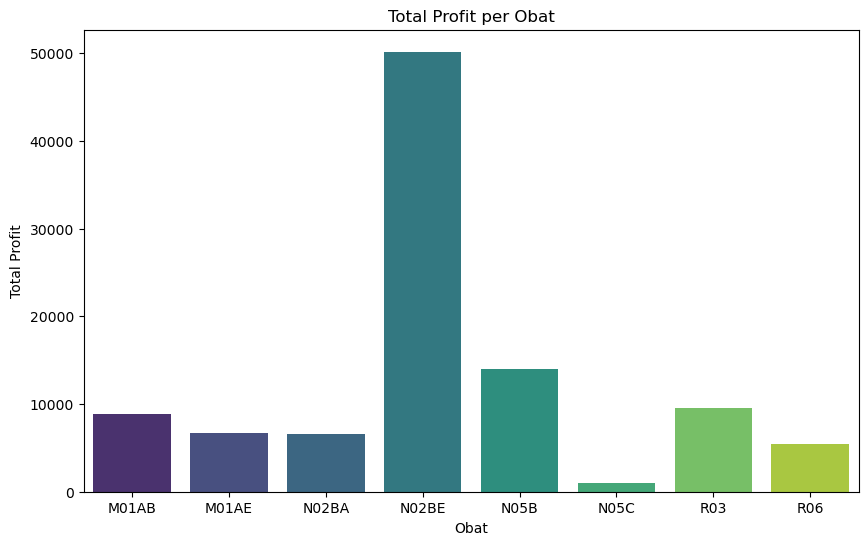

In [12]:
# Bar Chart: Total Profit masing-masing obat
plt.figure(figsize=(10,6))
sns.barplot(x=total_profit.index, y=total_profit.values, palette='viridis')
plt.title('Total Profit per Obat')
plt.ylabel('Total Profit')
plt.xlabel('Obat')
plt.show()

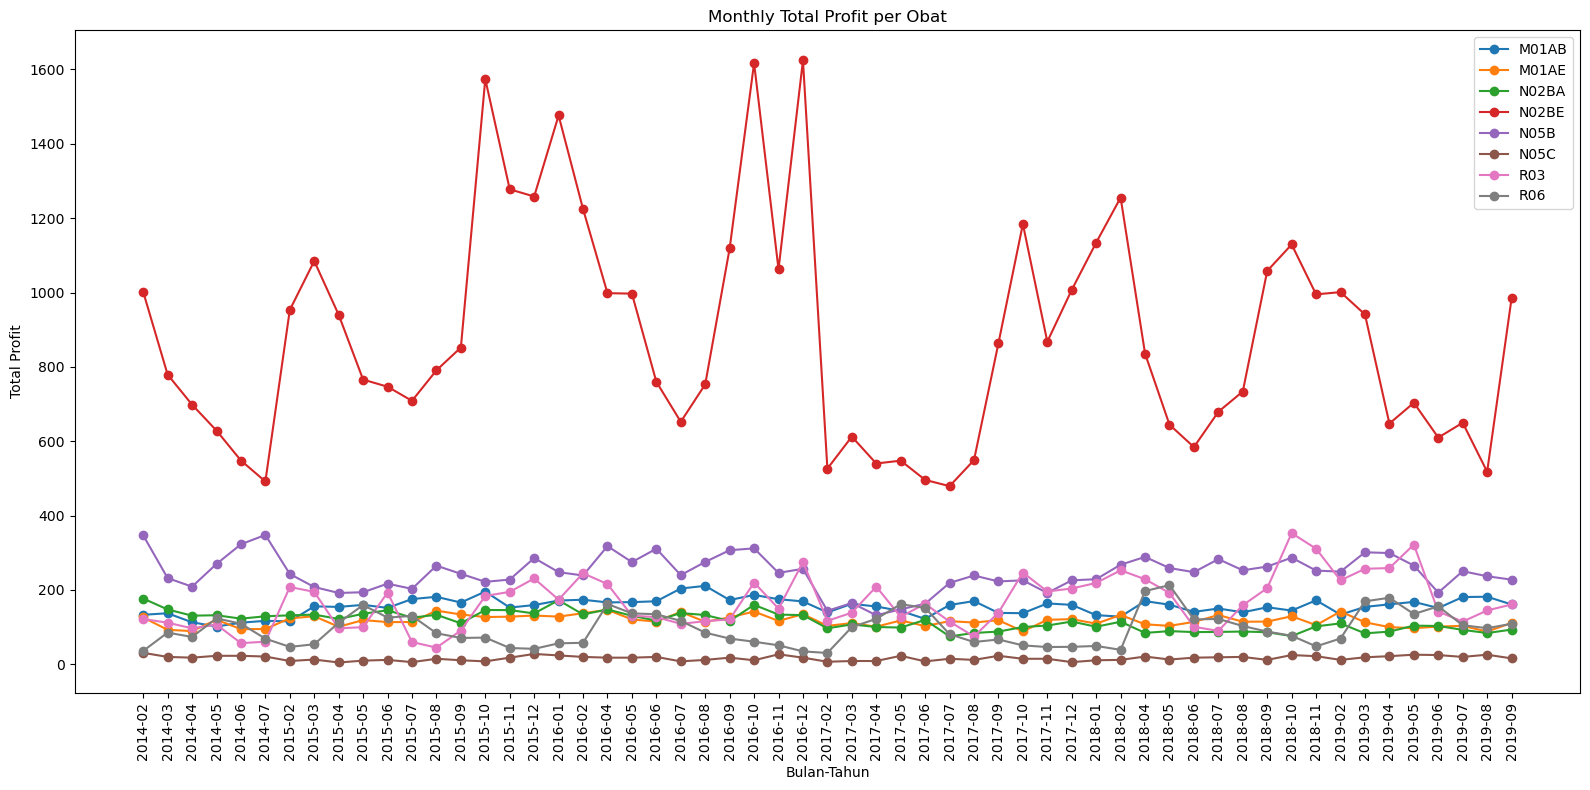

In [17]:
# Line Chart: Total Profit berdasarkan Bulan-Tahun untuk tiap obat
# Agregasi data per Bulan-Tahun
grouped = df_clean.groupby('Month_Year')[profit_cols].sum().reset_index()

plt.figure(figsize=(16,8))
for col in profit_cols:
    plt.plot(grouped['Month_Year'], grouped[col], marker='o', label=col)
plt.title('Monthly Total Profit per Obat')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# import pandas as pd
# import plotly.express as px
# import dash
# from dash import dcc, html

# # Baca data yang sudah dibersihkan
# df_clean = pd.read_csv('salesmonthly-CLEANED.csv')
# df_clean['datum'] = pd.to_datetime(df_clean['datum'])
# df_clean['Month_Year'] = df_clean['datum'].dt.strftime('%Y-%m')

# # Daftar kolom profit
# profit_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# # Agregasi total profit per obat
# total_profit = df_clean[profit_cols].sum()

# # Bar Chart: Total Profit per Obat
# bar_fig = px.bar(x=total_profit.index, y=total_profit.values,
#                  labels={'x': 'Obat', 'y': 'Total Profit'},
#                  title='Total Profit per Obat')

# # Agregasi data per Bulan-Tahun untuk line chart
# grouped = df_clean.groupby('Month_Year')[profit_cols].sum().reset_index()
# # Line Chart: Total Profit per Bulan-Tahun
# line_fig = px.line(grouped, x='Month_Year', y=profit_cols, markers=True,
#                    title='Monthly Total Profit per Obat')

# # Membangun Dashboard dengan Dash
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Data Sales Obat"),
#     dcc.Graph(figure=bar_fig),
#     dcc.Graph(figure=line_fig)
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
